Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\HP ELITEBOOK 840 G3\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Using cached pillow-11.2.1-cp310-cp310-win_amd64.whl (2.7 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\HP ELITEBOOK 840 G3\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
c:\Users\HP ELITEBOOK 840 G3\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9052 - loss: 0.3108 - val_accuracy: 0.9880 - val_loss: 0.0432
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9852 - loss: 0.0464 - val_accuracy: 0.9898 - val_loss: 0.0345
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.9907 - loss: 0.0281 - val_accuracy: 0.9853 - val_loss: 0.0491
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9938 - loss: 0.0198 - val_accuracy: 0.9895 - val_loss: 0.0349
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9953 - loss: 0.0149 - val_accuracy: 0.9903 - val_loss: 0.0372
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9842 - loss: 0.0497
Test accuracy: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


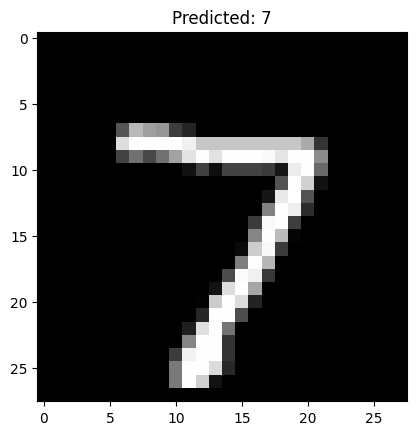

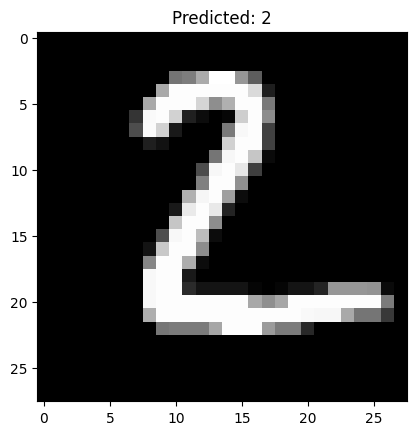

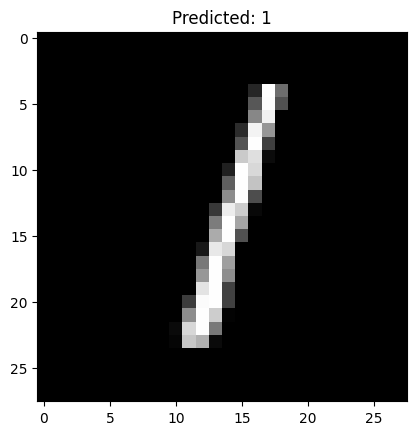

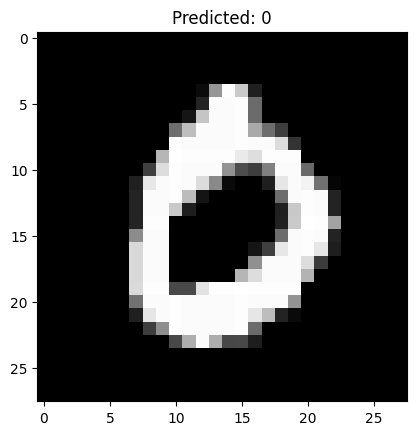

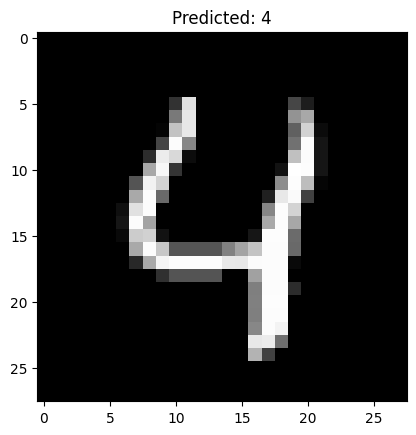

In [ ]:
%pip install tensorflow
%pip install matplotlib
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train[..., tf.newaxis]/255.0, X_test[..., tf.newaxis]/255.0

# Build Model
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile & Train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

# Visualize 5 predictions
predictions = model.predict(X_test[:5])
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()}")
    plt.show()
